# Using SignalRecognition and cwt_learner
This library provides a software implementation of a mentod to recognize events in signals. 
If you use this work in research, please cite this article: 
>
[G. Subramani, D. Rakita, H. Wang, J. Black, M. Zinn and M. Gleicher, "Recognizing actions during tactile manipulations through force sensing," 2017 IEEE/RSJ International Conference on Intelligent Robots and Systems (IROS), Vancouver, BC, 2017, pp. 4386-4393. doi: 10.1109/IROS.2017.8206302](http://reach.wisc.edu/recognizing-actions-during-tactile-manipulations-through-force-sensing/)

## Background


This software provides libraries necessary to transform signals to the __Continuous Wavelet Transform__ for the purpose of applying Machine Learning algorithms on the signals. __This can be used to detect events/signal shapes in time domain signals(containing multiple channels) by training on a few labeled examples.__ It can determine the type and timing of these events in the signals. 

`cwt_learner` is the class that implements the signal recognition software. 
`signal_data_base` is a convenience library to store and manage many time domain signals and their corresponding labels. You don't need this to use `cwt_learner`.

In [1]:
from cwt_learner.wavelet_feature_engineering import CWT_learner
from signal_data_base import SignalDB

In [2]:
import matplotlib.pyplot as plt
from plot_generator import plotResult_colorbars

The signals are loaded from a database.

In [3]:
sdb = SignalDB('JLego', path='./sample_data/')
training_data_ = sdb.get_labeleddata()

`training_data_` contains an array of `LabeledData`. Please see the file labelSelectedData.py for more information. Please print out `training_data_[0].labels and training_data_[0].signal_bundle_signals` to understand what they are. 

`LabeledData` object allows associating multiple signal channels and their corresponding labels together. In the real world, 

In [18]:
print 'training_data_ is a data set'
print 'Number of training data trials = ', len(training_data_)

Looking closely at one trial:

Number of time domain samples of first trial  9714
Events in first trial  ['', 'release_lego', 'hold_lego', 'grab_lego', 'pull_lego', 'still', 'insert_lego', 'search_lego']
11  time domain floating point signals reside in training_data_[0].signal_bundle.signals as a  <type 'list'>


In [28]:
print "Looking closely at one trial:\n"
print "Number of time domain samples of first trial ", len(training_data_[0].labels)
print "Events in first trial ", list(set(training_data_[0].labels)) 
print len(training_data_[0].signal_bundle.signals),\
    " time domain floating point signals reside in training_data_[0].signal_bundle.signals as a "\
    , type(training_data_[0].signal_bundle.signals)

Looking closely at one trial:

Number of time domain samples of first trial  9714
Events in first trial  ['', 'release_lego', 'hold_lego', 'grab_lego', 'pull_lego', 'still', 'insert_lego', 'search_lego']
11  time domain floating point signals reside in training_data_[0].signal_bundle.signals as a  <type 'list'>


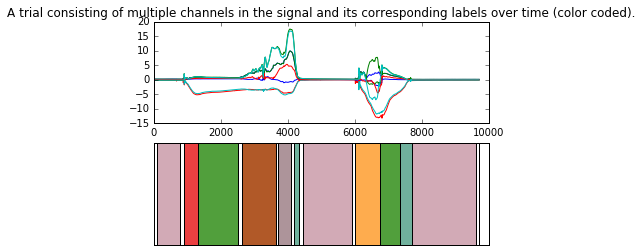

In [32]:
plt.figure()
plt.subplot(2,1,1)
plt.title("A trial consisting of multiple channels in the signal and its corresponding labels over time \
(color coded).")
for channel in training_data_[0].signal_bundle.signals:
    plt.plot(channel)
plt.subplot(2,1,2)
labels = training_data_[0].labels
plotResult_colorbars(labels, range(len(labels)))
plt.show()

Now we create a `cwt_learner` object and adding training data to it. 

`cwt_learn.add_training_data` can be used by adding an array of signals and their corresponding labels.

In [34]:
cwt_learn = CWT_learner(signal_indices = [0,1,2,3])
training_data = training_data_[0:8]
testing_data = training_data_[8:10]
for ld in training_data:
    labels = [label.split(' ')[0] for label in ld.labels]
    labels = [label.split(' ')[0] for label in ld.labels]
    cwt_learn.add_training_data(ld.signal_bundle.signals,labels)

In [35]:
cwt_learn.train()
labels = cwt_learn.fit(testing_data[0].signal_bundle.signals)

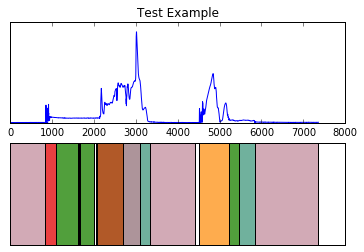

In [43]:
# Plotting

plt.figure()
plt.subplot(18,1,1)
plt.title("Training Data")
for ii in range(0,8):
    ax = plt.subplot(18,1,2*ii + 1)
    plt.plot(training_data[ii].signal_bundle.signals[0])
    ax.get_yaxis().set_visible(False)
    plt.subplot(18, 1, 2*ii + 2)
    plotResult_colorbars(training_data[ii].labels, range(len(training_data[ii].labels)))
plt.show()

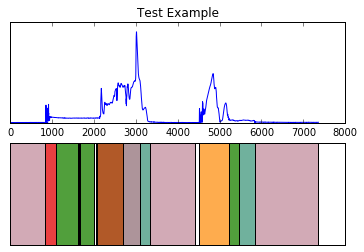

In [44]:
plt.figure()

ax = plt.subplot(2, 1, 1)
plt.title("Test Example")
plt.plot(testing_data[0].signal_bundle.signals[0])
ax.get_yaxis().set_visible(False)

plt.subplot(2, 1, 2)
plotResult_colorbars(labels, range(len(labels)))

plt.show()